In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
!python --version

2.8.0
Python 3.7.13


In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
cv2.__version__

'4.1.2'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
directory = '/content/gdrive/MyDrive/data/cats-vs-dogs/'
classes = ["dog", "cat"]

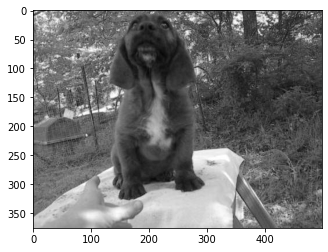

In [ ]:
for i in classes:
  path = os.path.join(directory, i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break

In [ ]:
batch_size = 5
img_height = img_width = 100

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size = (img_height,img_width),
    label_mode ='int',
    validation_split = 0.2,
    subset = "training",
    color_mode = 'rgb',
    seed = 2021,
    batch_size = batch_size
)

Found 20 files belonging to 3 classes.
Using 16 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size = (img_height,img_width),
    label_mode ='int',
    validation_split = 0.2,
    subset = "training",
    color_mode = 'rgb',
    seed = 2021,
    batch_size = batch_size
)

Found 20 files belonging to 3 classes.
Using 16 files for training.


In [ ]:
for image, label in val_ds:
  print(image.shape)
  print(image.shape)

class_names = train_ds.class_names
print(class_names)


(5, 100, 100, 3)
(5, 100, 100, 3)
(5, 100, 100, 3)
(5, 100, 100, 3)
(5, 100, 100, 3)
(5, 100, 100, 3)
(1, 100, 100, 3)
(1, 100, 100, 3)
['.ipynb_checkpoints', 'cat', 'dog']


In [ ]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

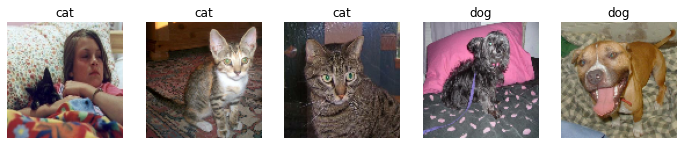

In [ ]:
plt.figure(figsize=(12,12))
for img, label in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")



In [ ]:
norm_layer = tf.keras.layers.Rescaling(scale = 1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y:(norm_layer(x), y))
imgs, lbl = next(iter(normalized_ds))
first_img = imgs[0]
print(np.min(first_img), np.max(first_img))

0.000966279 0.99976164
